## Unix

Find the total file size in bytes by extension for all files under the `./tree` directory (include files in sub directories, sub sub directories, etc).  Store your results in a dictionary from extension -> total size and print your directory as a 2 column tab delimited table like so:

> EXTENSION (tab) SIZE
> .ps (tab) 3000
> .pdf (tab) 5400


**Hint:** Use the [os.walk](https://docs.python.org/2/library/os.html) function to find all files below a directory.

In [1]:
import os

In [2]:
from itertools import chain,groupby
files = chain.from_iterable([ [x[0] + "/" + y for y in x[2]] for x in os.walk("./tree")])
fs = {}
for f in files:
    key = f.split(".")[-1]
    size = fs.get(key,0)
    size = size + os.path.getsize(f)
    fs[key] = size

for ext,size in fs.iteritems():
    print ext + "\t" + str(size)

txt	1472314
pdf	449530
csv	5625188


### Unix Shell Commands

Your solution to each of the two following problems should be a single command line which defines a sequence of unix commands connected by pipes.

#### Unix question 1
Print the number of times each character appears as the first character of a line in the file `word_list/canadian-words.95`.  

Your output should appear like this:

`
 224 a
  54 b
 251 c
 156 d
  99 e
  85 f
  62 g
 168 h
  83 i
   8 j
   7 k
  81 l
...`

In [3]:
!cat word_list/canadian-words.95 | cut -b1 | uniq -c

    224 a
     54 b
    251 c
    156 d
     99 e
     85 f
     62 g
    168 h
     83 i
      8 j
      7 k
     81 l
    164 m
     98 n
    101 o
    442 p
      7 q
    145 r
    217 s
    105 t
    345 u
     59 v
     17 w
      3 z


#### Unix question 2

Find all lines of the file `word_list/canadian-words.95` which contain a repeated letter.  IE 'Sneeze' contains a repeated e while 'Sneze' does not.  Count the number of words this occurs in.

The correct output is 351

**Hint:** Grep backreferences may be useful.

In [4]:
!cat word_list/canadian-words.95 | grep "\(.\)\1" | wc -l

351


##Python Programming

Write a list comprehension that creates a list containing all of the numbers that are both exact squares and odd in the range 1 to 100.

In [5]:
import math
[ x for x in range(1,101) if x %2 ==1 and math.pow(int(math.sqrt(x)),2)==x ]

[1, 9, 25, 49, 81]

Write a function expand which takes a word and repeats each character one more time than the previous character.

For example "BANG!" becomes "BAANNNGGGG!!!!!"

In [6]:
def expand(word):
    out = ""
    for i in range(len(word)):
        out = out + word[i]*(i+1)
    return out
expand("BANG!")

'BAANNNGGGG!!!!!'

Write a function "string_value" which takes a string, converts each letter to its ascii code (*hint: the ord function returns a characters ascii value*) and returns the sum of the strings ascii values.  For example cat -> [99, 97, 116] -> 312.  

Then load the file `word_list/canadian-words.95` into a list and sort the list by the value returned by string_value

In [7]:
def string_value(word):
    return sum([ord(x) for x in word])

words = open("word_list/canadian-words.95","r").readlines()
words = [word.strip() for word in words]
sorted(words,key=string_value)

['aec',
 'coe',
 'cre',
 'crea',
 'fred',
 'akre',
 'reke',
 'nere',
 'cize',
 'quae',
 'waer',
 'gres',
 'danae',
 'aigre',
 'heloe',
 'creat',
 'moeck',
 'grene',
 'meloe',
 'cuvae',
 'nigre',
 'goloe',
 'shree',
 'aesop',
 'briza',
 'bizet',
 'goura',
 'izing',
 'warre',
 'weize',
 'stret',
 'jours',
 'spyre',
 'soury',
 'haemad',
 'archae',
 'aeneid',
 'napaea',
 'caffre',
 'aeolic',
 'oecoid',
 'boloed',
 'charre',
 'rebias',
 'infree',
 'pensae',
 'lingoe',
 'entrae',
 'pommae',
 'corvae',
 'preces',
 'egoize',
 'cintre',
 'courge',
 'prefet',
 'preved',
 'weized',
 'borize',
 'feutre',
 'vizied',
 'clowre',
 'profre',
 'auntre',
 'bourds',
 'poudre',
 'coetus',
 'aestus',
 'weizes',
 'oursel',
 'loutre',
 'touret',
 'coursy',
 "zoaea's",
 "ombre's",
 'archaei',
 'pangaea',
 'aerical',
 'amoebid',
 'faoence',
 'phialae',
 'paginae',
 'chacoes',
 'chiffre',
 'megaerg',
 'plataea',
 'childre',
 'coenobe',
 'melinae',
 'ephetae',
 'aemuled',
 'coeloma',
 'koellia',
 'meagrer',
 'cou

##Git/iPython Magics
Load your repositories .gitignore file using ipython magics.  Modify the file so that it ignores files with the extension .ignoreme.  Write the file using ipython magics

In [8]:
%load ../.gitignore

In [ ]:
.ipynb_checkpoints
*/.ipynb_checkpoints


In [10]:
%%writefile ../.gitignore
.ipynb_checkpoints
*/.ipynb_checkpoints
*.ignoreme

Overwriting ../.gitignore


## Pandas and Matplot Lib
The CSV file called `temps.csv` contains the daily temperature recorded for a particular year at a particular meteorological station in the USA. Also given is the state where each 
station is located.

Some of the entries are empty, which indicates "undefined"

Create a data frame that summarizes the data by by state

The summary data frame should have the following 7 columns:
  * State
  * Number of years recorded for this state
  * The maximum temperature recorded in this state
  * The minimum temperature recorded in this state
  * The mean temperature for this region
  * The number of undefined measurements 
  
Sort the table by decreasing value of the mean temperature and print the first 10 rows.  

In [4]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
raw_data = pd.read_csv("temps.csv")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
states = {}
raw_data.iterrows().next()[1]["state"]
for ind,row in raw_data.iterrows():
    state = row["state"]
    temps = [x for x in row["1":"365"] if not np.isnan(x)]

    if state not in states:
        states[state] = {"state":state, "years":0, "max":-300, "min":300, "sum":0, "n":0, "n_nan":0}
    states[state]["years"] += 1
    if len(temps) > 0:
        states[state]["max"]   = max(states[state]["max"],max(temps))
        states[state]["min"]   = min(states[state]["min"],min(temps))
        states[state]["sum"]   += sum(temps)
        states[state]["n"]     += len(temps)
    states[state]["n_nan"] += len([x for x in row["1":"365"] if np.isnan(x)])


In [ ]:
summary = pd.DataFrame([row for s,row in states.iteritems()])
summary["mean"] = summary["sum"]/summary["n"]
summary.sort("mean",ascending=False,inplace=True)
summary.head(10)

In [ ]:
us_mean = summary["sum"].sum() / summary["n"].sum()

Using the summary data frame produced before, make a bar plot showing the mean temperature of each state in the USA.  Label each bar with the state name.  Then put a line across all bars showing the mean temperature of the US.

An example of the kind of plot we want is [here](http://static1.businessinsider.com/image/52e7cfeaecad04b858356443/here-are-the-states-with-the-highest-and-lowest-unemployment-rates.jpg).  You can make the plot either vertical or horizontal, whichever you think displays the data better.

In [ ]:
fig = plt.figure(figsize=(24, 4))
ax = fig.gca()
ax.bar([x + .25 for x in range(summary.shape[0])], summary["mean"],width = .5, color = "k")
ax.set_xticks([x + .5 for x in range(summary.shape[0])])
ax.set_xticklabels( summary["state"]) 
ax.width = 1000
ax.plot([0,summary.shape[0]],[us_mean,us_mean],'r--')
ax.legend(["US Mean Temperature","State Mean Temperature"])
plt.show()

Using the raw data frame, pick the state with the highest mean and the lowest mean.  Plot the temperature on the first day of the year vs year for these two states as a line plot.  Make line for the highest mean state be red and the lowest mean state be blue.  Add a legend mapping from line color -> state name.

In [ ]:
raw_data.sort("year",inplace=True)
min_state = raw_data[raw_data['state'] == "SD"]
max_state = raw_data[raw_data['state'] == "WA"]
fig = plt.figure(figsize=(24, 4))
ax = fig.gca()
ax.plot(min_state["year"],min_state["1"],'b')
ax.plot(max_state["year"],max_state["1"],'r')
ax.legend(["SD","WA"])

## MatplotLib
The shape of a Limaçon (https://en.wikipedia.org/wiki/Lima%C3%A7on) can be defined parametrically as

1. r = r0 + cos θ
2. x = r cos θ
3. y = r sin θ

When r0 = 1, this curve is called a cardioid. Write a function using this definition which will take r0 values and plot the shape of a Limaçon. Cal the function for r0 = 0.8, r0 = 1.0, and r0 = 1.2. 

Be sure to use enough points that the curve is closed and appears smooth (except for
the cusp in the cardioid). Use a legend to identify which curve is which.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


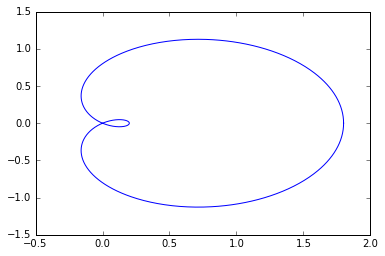

In [7]:
def limacon(r0):
    theta = np.linspace(0, 2 * pi, 1000)
    r=r0+cos(theta)
    x=r*cos(theta)
    y=r*sin(theta)
    plt.plot(x,y)
    
limacon(0.8)

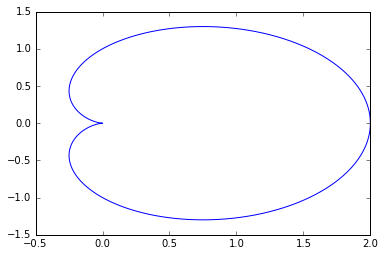

In [8]:
limacon(1)

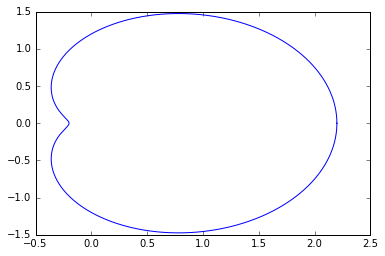

In [9]:
limacon(1.2)

##Object Oriented Programming
Assume you are working for a bank and have been tasked with implimenting objects to manage their accounts.  The architecht has given you this class to inherit from and wants you to impliment a number of unique account types.

In [16]:
class Account:
    def __init__(self, amount, rate):
        """Initializes the account, all account types have a starting amount and a rate"""
        self.amount = amount
        self.rate = rate
        self.day = 0
        
    def balance(self):
        """Returns the balance of the account"""
        return self.amount
    
    def deposit(self, amount):
        """Deposits money into the account depending on specific rules.
           Returns true if the deposit is accepted and false if it is not"""
        raise "This is an abstract class" 
    
    def withdraw(self, amount):
        """Withdraws money from the account.
           Returns true if the deposit is accepted and false if it is not"""
        raise "This is an abstract class"
        
    def tick(self):
        """Called once a day, used to compute interest or any other logic that must occur every day"""
        self.day = self.day + 1
        self._tick_action()
        
    def _tick_action(self):
        """Logic that should happen on tick goes here"""
        raise "This is an abstract class"

As an example the architecht gives you the basic account class.  A basic account always accepts deposits but only accepts withdraws if customer withdraws less money than the current balance.  Additionally the interest is accumulated every day.

In [17]:
class BasicAccount(Account):
    def deposit(self, amount):
        self.amount = self.amount + amount
        return True
    
    def withdraw(self, amount):
        """Withdraws money from the account.
           Returns true if the deposit is accepted and false if it is not"""
        if( amount <= self.amount ):
            self.amount = self.amount - amount
            return True
        else:
            return False
        
    def _tick_action(self):
        self.amount = self.amount + self.rate*self.amount

Your first task is to impliment the SuperSaverAccount class which is the same as the basic account except that it only accrues interest once every 30 days.

In [18]:
class SuperSaverAccount(Account):
    def deposit(self, amount):
        self.amount = self.amount + amount
        return True
    
    def withdraw(self, amount):
        if( amount <= self.amount ):
            self.amount = self.amount - amount
            return True
        else:
            return False        
    def _tick_action(self):
        if self.day % 30 == 0:
            self.amount = self.amount + self.rate*self.amount

Now impliment the PlatinumAccount class.  The platinum account allows any withdraw or deposit; however, they don't go through until the end of the day.  At the end of the day all withdraws are processed and then all deposits are processed.  If the balance ever goes below 0, the balance is reduced by \$100 as a penalty.  If the amount is above 0 at the end of the day, interest is added the same as a standard account.

When inquiring about the balance, it should return the current amount of the account + pending deposits - pending withdraws but no any penalty

In [19]:
class PlatinumAccount(Account):
    def __init__(self, amount, rate):
        Account.__init__(self,amount, rate) 
        self.d = 0
        self.w = 0
        
    def deposit(self, amount):
        self.d += amount
        return True
    
    def withdraw(self, amount):
        self.w -= amount
        return True
    
    def balance(self):
        return self.amount + self.d + self.w
        
    def _tick_action(self):
        self.amount += self.w
        if self.amount < 0:
            self.amount -= 100
        self.amount += self.d
        self.amount = self.amount + self.rate*self.amount
        self.d = 0
        self.w = 0

After you implemented the account classes, you are now tasked with implementing the bank class.  This class is responsible for managing a group of accounts.

When an account is created, it is assigned a seiral number (the first account is 0, second 1, etc) and stored at the bank, this number is returned by create_account.  The customer then gives the account number whenever they want to perform an acction on the account.

In [20]:
class Bank:
    def __init__(self):
        self.accounts = []
    
    def create_account(self,account):
        """Registers the `account` object with the bank.  Returns the account number assigned to this account"""
        self.accounts.append(account)
        return len(self.accounts)-1
        
    def deposit(self, account_number, amount):
        """Looks up the account corrsponding to `account_number` and deposits `amount` into it"""
        return self.accounts[account_number].deposit(amount)

    def withdraw(self, account_number, amount):
        """Looks up the account corrsponding to `account_number` and withdraws `amount` into it"""
        return self.accounts[account_number].withdraw(amount)

    def balance(self, account_number):
        """Looks up the account corrsponding to `account_number` and returns the balance"""
        return self.accounts[account_number].balance()
        
    def tick(self):
        for a in self.accounts:
            a.tick()

In [21]:
#After everythign is done this should only print True a bunch of times:

bank = Bank()
a = bank.create_account(BasicAccount(0,0.1))
print bank.balance(a) == 0
print bank.deposit(a,100) == True
print bank.balance(a) == 100
print bank.withdraw(a,1000) == False
print bank.balance(a) == 100

bank.tick()
b = bank.create_account(PlatinumAccount(0,0.1))
print bank.balance(b) == 0
print bank.deposit(b,1000) == True
print bank.withdraw(b,100) == True
print bank.balance(b) == 900
bank.tick()
print bank.balance(b) == 880

c = bank.create_account(SuperSaverAccount(0,0.1))
print bank.deposit(c,100)
for i in range(29):
    bank.tick()
    print bank.balance(c) == 100
bank.tick()
print bank.balance(c) == 110

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
